In [18]:
# Import necessary libraries
import cobra
import itertools
import matplotlib.pyplot as plt
import networkx as nx
import os
import pandas as pd
import random

input_path = '/mnt/Local_Disk_1/Hospital_Microbiome/Data/Output_data/network_files/'
model_path = '/mnt/Local_Disk_1/Hospital_Microbiome/Data/Modeling/Models/'
output_path = '/mnt/Local_Disk_1/Hospital_Microbiome/Data/Modeling/'
sample_path = '/mnt/Local_Disk_1/Hospital_Microbiome/Data/Output_data/phyloseq_source/'

In [ ]:
# Load all the models
os.chdir(model_path)

# Create an empty DataFrame to store the results
model_info = pd.DataFrame(columns=["Model", "Predicted growth rate", "Number of Genes", "Number of Metabolites", "Number of Reactions"])

# Loop through each SBML file
for models in os.listdir(model_path):
    if models.endswith(".xml"): 
        model = cobra.io.read_sbml_model(models) 
        solution = model.optimize()
        model_info.loc[len(model_info)] = { 
            "Model": models, 
            "Predicted growth rate": solution.objective_value,
            "Number of Genes": len(model.genes),
            "Number of Metabolites": len(model.metabolites),
            "Number of Reactions": len(model.reactions)
        }

model_info.set_index('Model', inplace=True)

# Save the results
model_info.to_csv(output_path + 'model_info.csv', sep = ",", index = True)

model_info

In [13]:
# Generating smetana scores for the communities
environments = ["Hospital", "MetaSUB", "Office"]

# Loading nodes/ interactions informations
nodes_info, edges_info = {}, {}

for env in environments:
    net_edges = pd.read_csv(input_path + env + '_edges.tsv', sep = ",")
    nodes = list(set((list(net_edges['v1']) + list(net_edges['v2']))))
    nodes_info[env] = nodes
    edges_info[env] = net_edges

# Loading abundance information
sample_info = {}

for env in environments:
    sample_info[env] = pd.read_csv(sample_path + env + '_filtered_data.csv', sep = ",")
    sample_info[env].set_index('Species', inplace = True)

sample_info['Hospital'].head()
#edges_info['Hospital'].head()

,MEE001,MEE002,MEE003,MEE004,MEE005,MEE006,MEE007,MEE008,MEE009,MEE010,...,WEE376,WEE377,WEE378,WEE379,WEE380,WEE381,WEE382,WEE384,WEE385,WEE386
Species,,,,,,,,,,,,,,,,,,,,,
Abiotrophia defectiva,0.00000,0.00317,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,...,0.00000,0.00000,0.17724,0.00000,0.0,0.00578,0.00000,0.00129,0.00777,0.00518
Achromobacter xylosoxidans,0.00000,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.00215,0.0,...,0.00000,0.00000,0.00000,0.00000,0.0,0.00000,0.00000,0.00000,0.00000,0.00000
Acinetobacter baumannii,0.00258,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,...,0.01955,0.00427,0.01885,0.00785,0.0,0.02886,0.00532,0.00551,0.00291,0.01378
Acinetobacter johnsonii,0.00000,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,...,0.00000,0.00000,0.00000,0.00255,0.0,0.00000,0.01293,0.00204,0.00000,0.00000
Acinetobacter junii,0.00281,0.01040,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,...,0.00193,0.00000,0.00468,0.00409,0.0,0.00300,0.00311,0.00556,0.00000,0.00400


In [26]:
# Saving network information from the edge file to the networkx graph
network_info = {}

for env in environments:
    G = nx.Graph()

    # Add edges
    for _, row in edges_info[env].iterrows():
        G.add_edge(row['v1'], row['v2'], weight = row['Weight'])
    
    network_info[env] = G
    
# Network details
network_data = pd.DataFrame(columns=["Network", "Number of Nodes", 
                                    "Number of Edges"])

for graph_name, graph in network_info.items():

    # Extract network information
    num_nodes = len(graph.nodes)
    num_edges = len(graph.edges)

    # Create a DataFrame to store the results
    network_data.loc[len(network_data)] = [graph_name, num_nodes, num_edges]

network_data.set_index('Network', inplace=True)
network_data

,Number of Nodes,Number of Edges
Network,,
Hospital,83,506
MetaSUB,43,97
Office,14,30


In [ ]:
# Simulating communities
com_size = [2, 5, 10]
num_com = [10, 20]



In [ ]:
# Initiate dataframe to store the community information
community_info = pd.DataFrame(columns=["community id", "organism id"])

for size in com_size:
    for num in num_com:
        for env in environments:

            # Load the network
            G = network_info[env]

    

,community id,organism id
0,Office_5_5_1,Micrococcus luteus
1,Office_5_5_1,Caulobacter vibrioides
2,Office_5_5_1,Brevibacterium casei
3,Office_5_5_1,Acinetobacter parvus
4,Office_5_5_1,Methylorubrum populi
5,Office_5_5_2,Microbacterium laevaniformans
6,Office_5_5_2,Methylorubrum extorquens
7,Office_5_5_2,Caulobacter vibrioides
8,Office_5_5_2,Methylorubrum populi
9,Office_5_5_2,Cutibacterium acnes


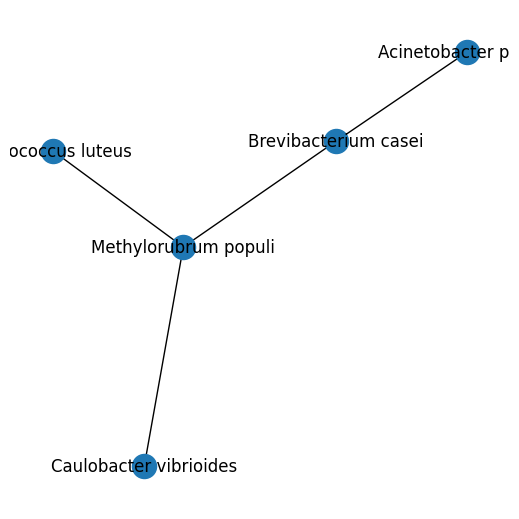

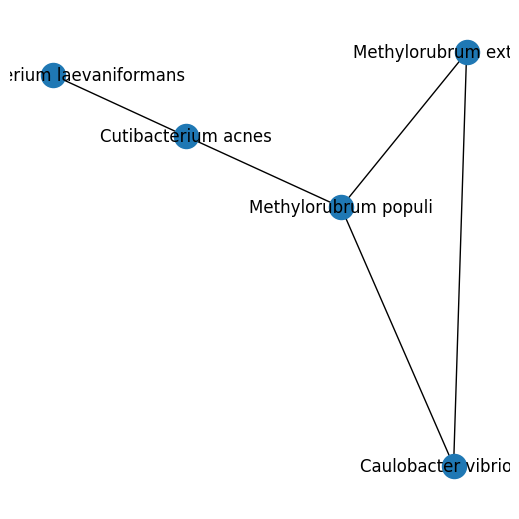

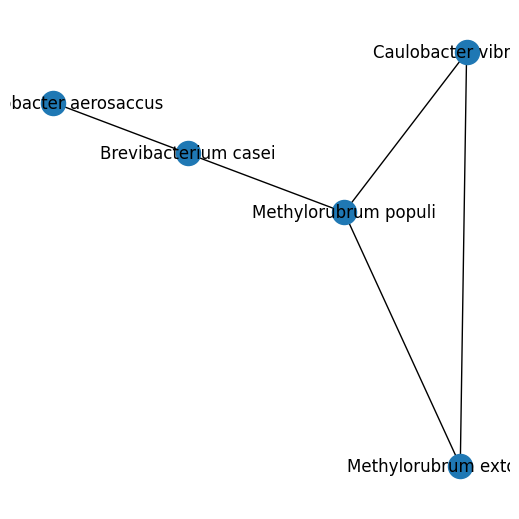

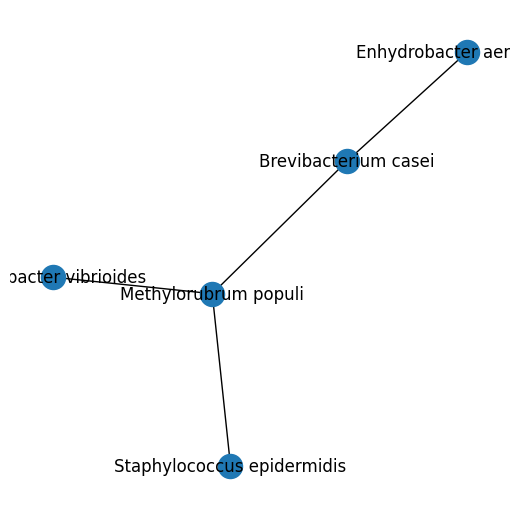

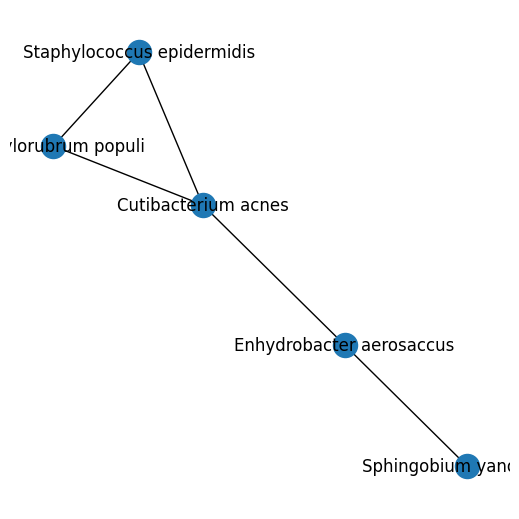

In [52]:
# Set a seed for reproducibility
random.seed(42)

# Generate random subgraphs
def generate_random_subgraphs(graph, env="Hospital", num_nodes=5, num_subgraphs=10, sample_info=sample_info):
    community_df = {"community id": [], "organism id": []}
    communities_generated = 0

    while communities_generated < num_subgraphs:
        node_list = list(graph.nodes())
        nodes = random.sample(node_list, num_nodes)  
        subgraph = graph.subgraph(nodes)  

        if nx.is_connected(subgraph):  
            community_id = f"{env}_{num_nodes}_{num_subgraphs}_{communities_generated+1}" 
            organism_ids = list(subgraph.nodes())
            sample_subset = sample_info[env].loc[sample_info[env].index.isin(organism_ids)]

            if (sample_subset != 0).all().sum() > 0:
                for org_id in organism_ids:
                    community_df["community id"].append(community_id)
                    community_df["organism id"].append(org_id)

                communities_generated += 1
                
                # Plot the subgraph
                #figure = plt.figure(figsize=(5, 5))
                #nx.draw(subgraph, with_labels=True)

    return pd.DataFrame(community_df)

random_subgraphs_df = generate_random_subgraphs(G, env, 5, 5, sample_info)


In [34]:
# Set a seed for reproducibility
random.seed(42)

# Generate random subgraphs
def generate_random_subgraphs(graph, env="Hospital", num_nodes=5, num_subgraphs=10, sample_info=sample_info):
    community_df = {"community id": [], "organism id": []}
    community_generated = 0
    
    for i in range(num_subgraphs):
        node_list = list(graph.nodes())
        nodes = random.sample(node_list, num_nodes)  
        subgraph = graph.subgraph(nodes)  
        if nx.is_connected(subgraph):  
            community_id = f"{env}_{num_nodes}_{num_subgraphs}_{i+1}" 
            organism_ids = list(subgraph.nodes())
            sample_subset = sample_info[env].loc[sample_info[env].index.isin(organism_ids)]
            if (sample_subset != 0).all().sum() > 0:
                for org_id in organism_ids:
                    community_df["community id"].append(community_id)
                    community_df["organism id"].append(org_id)

        else:
            # If subgraph is not connected, try again with different nodes
            while True:
                nodes = random.sample(node_list, num_nodes)
                subgraph = graph.subgraph(nodes)
                if nx.is_connected(subgraph):
                    community_id = f"{env}_{num_nodes}_{num_subgraphs}_{i+1}" 
                    organism_ids = list(subgraph.nodes())
                    sample_subset = sample_info[env].loc[sample_info[env].index.isin(organism_ids)]
                    if (sample_subset != 0).all().sum() > 0:
                        for org_id in organism_ids:
                            community_df["community id"].append(community_id)
                            community_df["organism id"].append(org_id)
                    break

    return pd.DataFrame(community_df)

random_subgraphs_df = generate_random_subgraphs(G, env, 5, 10)
random_subgraphs_df

,community id,organism id
0,Office_5_10_5,Micrococcus luteus
1,Office_5_10_5,Caulobacter vibrioides
2,Office_5_10_5,Brevibacterium casei
3,Office_5_10_5,Acinetobacter parvus
4,Office_5_10_5,Methylorubrum populi
5,Office_5_10_9,Microbacterium laevaniformans
6,Office_5_10_9,Methylorubrum extorquens
7,Office_5_10_9,Caulobacter vibrioides
8,Office_5_10_9,Methylorubrum populi
9,Office_5_10_9,Cutibacterium acnes


/tmp/ipykernel_1051406/3147527612.py:5: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  nodes = random.sample(graph.nodes(), 5)  # Select 5 random nodes


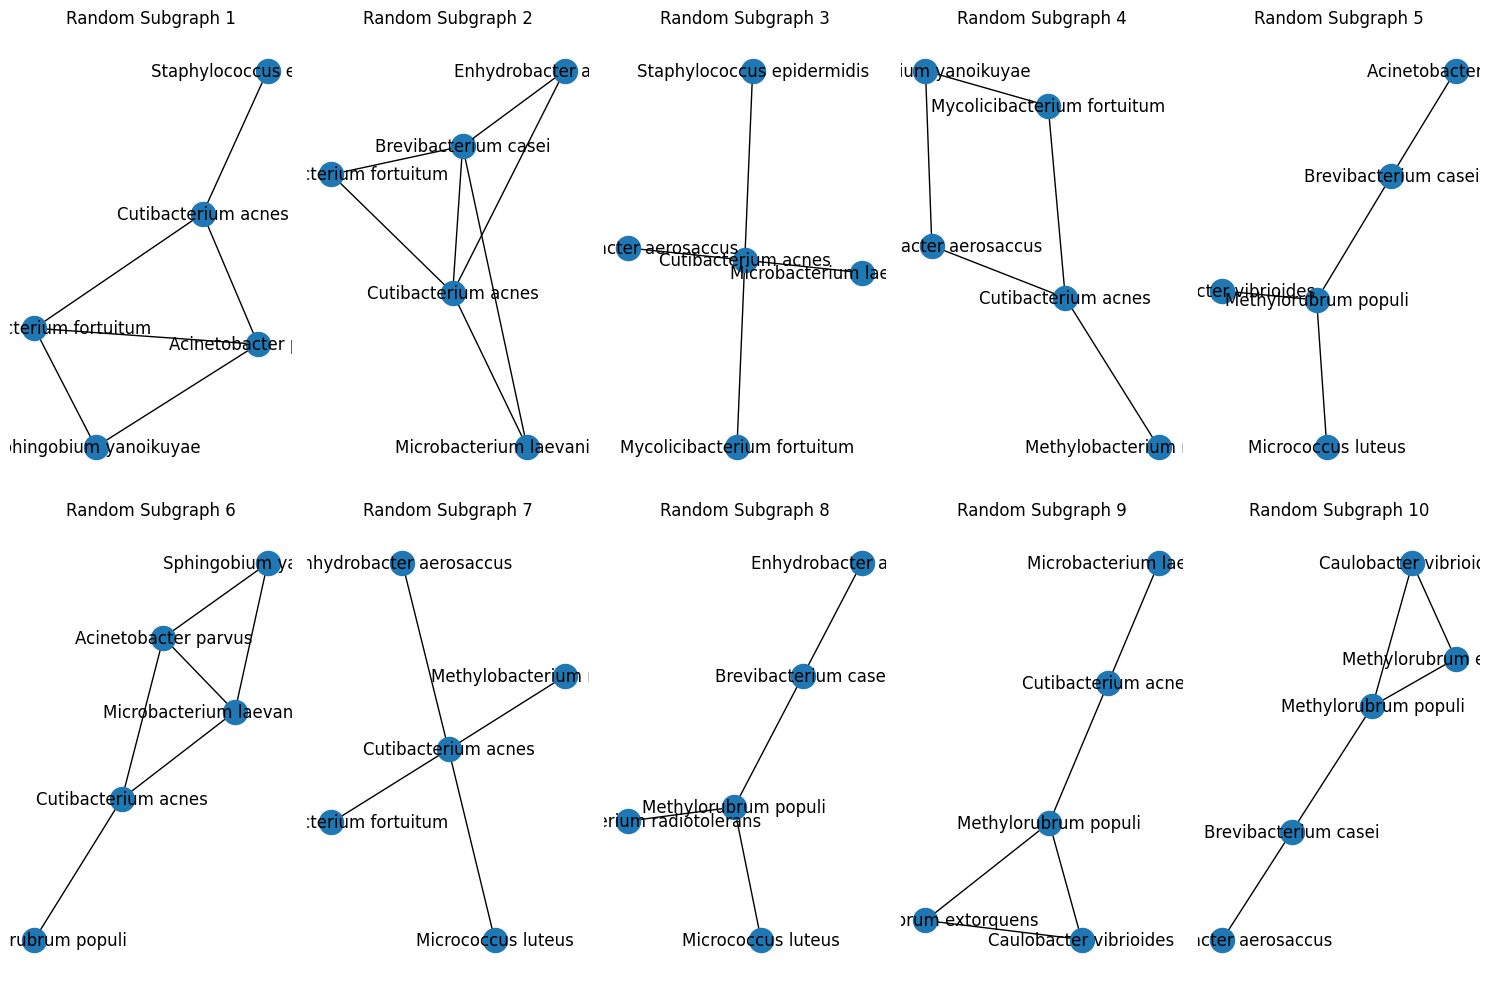

In [22]:
# Set a seed for reproducibility
random.seed(42)

# Generate a random subgraph of given community size
def generate_random_subgraph(graph, community_size=5):
    """
    Generate a random subgraph of a given size from a graph
    graph: NetworkX graph
    community_size: int, number of nodes in the subgraph
    """
    nodes = random.sample(graph.nodes(), community_size)
    subgraph = graph.subgraph(nodes)  
    if nx.is_connected(subgraph):  
        return subgraph
    else:
        return generate_random_subgraph(graph)  



# Generate 10 random subgraphs with 5 members
random_subgraphs = []
for _ in range(10):
    subgraph = generate_random_subgraph(G)
    random_subgraphs.append(subgraph)

# Print the random subgraphs
plt.figure(figsize=(15, 10))
for i, subgraph in enumerate(random_subgraphs, 1):
    plt.subplot(2, 5, i)
    nx.draw(subgraph, with_labels=True)
    plt.title(f"Random Subgraph {i}")

plt.tight_layout()
plt.show()


In [ ]:


for env in environments:
    

